In [85]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

## 1. Data Processing and Preparation

In [86]:
credit = pd.read_csv('Resources/credit-approval_csv - pandas.csv')
credit

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [87]:
#get summary of numeric columns
credit.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [88]:
# Replace "?" with NaN
credit.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
credit["Age"] = pd.to_numeric(credit["Age"])
# credit_copy = credit[:,:]
#credit_copy = credit.copy()

In [89]:
#replace missing values with mean values of numeric columns
credit.fillna(credit.mean(), inplace=True)

In [90]:
def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(credit)

In [91]:
credit_drop=credit

In [92]:
credit_drop=credit.drop(["ZipCode"],axis=1)

In [93]:
credit_drop

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,1442,+


In [94]:
credit_drop.describe

<bound method NDFrame.describe of     Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
0        b  30.83   0.000       u            g              w         v   
1        a  58.67   4.460       u            g              q         h   
2        a  24.50   0.500       u            g              q         h   
3        b  27.83   1.540       u            g              w         v   
4        b  20.17   5.625       u            g              w         v   
5        b  32.08   4.000       u            g              m         v   
6        b  33.17   1.040       u            g              r         h   
7        a  22.92  11.585       u            g             cc         v   
8        b  54.42   0.500       y            p              k         h   
9        b  42.50   4.915       y            p              w         v   
10       b  22.08   0.830       u            g              c         h   
11       b  29.92   1.835       u            g              c     

In [95]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in credit_drop:
    if credit_drop[col].dtypes=='object':
        credit_drop[col]=LE.fit_transform(credit_drop[col])

In [96]:
credit_drop.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0


In [97]:
#HOT ENCODER
#convert to categorical data to dummy data
credit_dummies = pd.get_dummies(credit_drop, columns=[ "Married","EducationLevel", "Citizen", "DriversLicense", "Ethnicity"])
credit_dummies.head()

,Gender,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved,...,DriversLicense_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Ethnicity_6,Ethnicity_7,Ethnicity_8
0,1,30.83,0.000,0,1.25,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,58.67,4.460,0,3.04,1,1,6,560,0,...,0,0,0,0,1,0,0,0,0,0
2,0,24.50,0.500,0,1.50,1,0,0,824,0,...,0,0,0,0,1,0,0,0,0,0
3,1,27.83,1.540,0,3.75,1,1,5,3,0,...,1,0,0,0,0,0,0,0,1,0
4,1,20.17,5.625,0,1.71,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [98]:
credit_dummies.columns

Index(['Gender', 'Age', 'Debt', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income', 'Approved',
       'Married_0', 'Married_1', 'Married_2', 'EducationLevel_0',
       'EducationLevel_1', 'EducationLevel_2', 'EducationLevel_3',
       'EducationLevel_4', 'EducationLevel_5', 'EducationLevel_6',
       'EducationLevel_7', 'EducationLevel_8', 'EducationLevel_9',
       'EducationLevel_10', 'EducationLevel_11', 'EducationLevel_12',
       'EducationLevel_13', 'Citizen_0', 'Citizen_1', 'Citizen_2',
       'DriversLicense_0', 'DriversLicense_1', 'Ethnicity_0', 'Ethnicity_1',
       'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4', 'Ethnicity_5',
       'Ethnicity_6', 'Ethnicity_7', 'Ethnicity_8'],
      dtype='object')

In [15]:
#credit_dummies=credit_drop

In [99]:
credit_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 41 columns):
Gender               690 non-null int32
Age                  690 non-null float64
Debt                 690 non-null float64
BankCustomer         690 non-null int32
YearsEmployed        690 non-null float64
PriorDefault         690 non-null int32
Employed             690 non-null int32
CreditScore          690 non-null int64
Income               690 non-null int64
Approved             690 non-null int32
Married_0            690 non-null uint8
Married_1            690 non-null uint8
Married_2            690 non-null uint8
EducationLevel_0     690 non-null uint8
EducationLevel_1     690 non-null uint8
EducationLevel_2     690 non-null uint8
EducationLevel_3     690 non-null uint8
EducationLevel_4     690 non-null uint8
EducationLevel_5     690 non-null uint8
EducationLevel_6     690 non-null uint8
EducationLevel_7     690 non-null uint8
EducationLevel_8     690 non-null uint8
Education

In [100]:
credit_dummies.describe()

,Gender,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved,...,DriversLicense_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Ethnicity_6,Ethnicity_7,Ethnicity_8
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,...,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.568171,4.758725,0.475362,2.223406,0.523188,0.427536,2.40000,1017.385507,0.555072,...,0.457971,0.085507,0.008696,0.082609,0.20000,0.011594,0.005797,0.002899,0.591304,0.011594
std,0.460464,11.853273,4.978163,0.850238,3.346513,0.499824,0.495080,4.86294,5210.102598,0.497318,...,0.498592,0.279838,0.092912,0.275490,0.40029,0.107128,0.075973,0.053799,0.491949,0.107128
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,0.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,28.625000,2.750000,0.000000,1.000000,1.000000,0.000000,0.00000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,37.707500,7.207500,0.000000,2.625000,1.000000,1.000000,3.00000,395.500000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,80.250000,28.000000,2.000000,28.500000,1.000000,1.000000,67.00000,100000.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


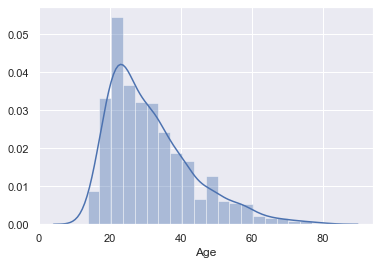

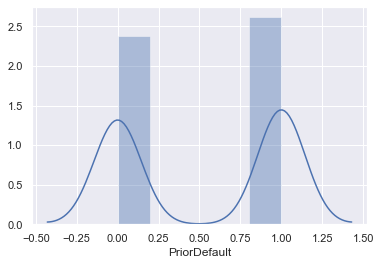

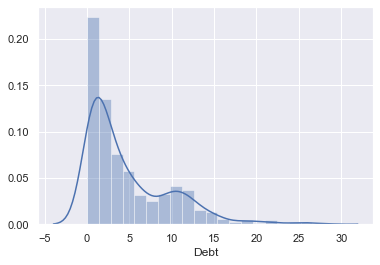

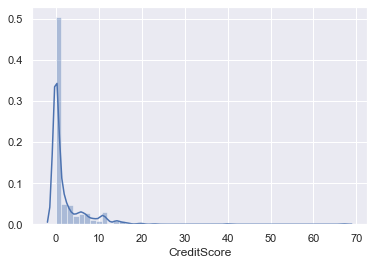

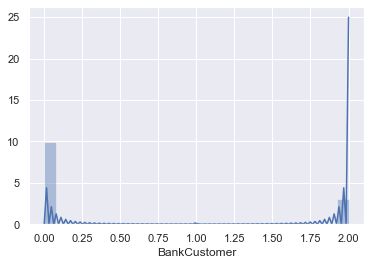

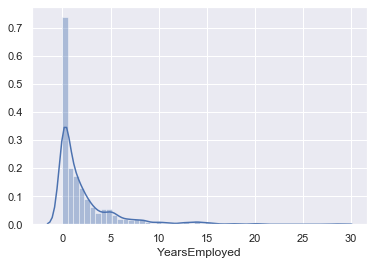

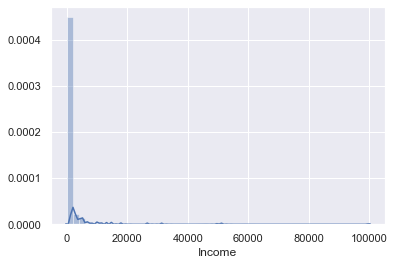

<Figure size 432x288 with 0 Axes>

In [102]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(credit_drop['Age'])
plotDistPlot(credit_drop['PriorDefault'])
plotDistPlot(credit_drop['Debt'])
plotDistPlot(credit_drop['CreditScore'])
plotDistPlot(credit_drop['BankCustomer'])
plotDistPlot(credit_drop['YearsEmployed'])
plotDistPlot(credit_drop['Income'])
plt.savefig('Distribution.jpeg')

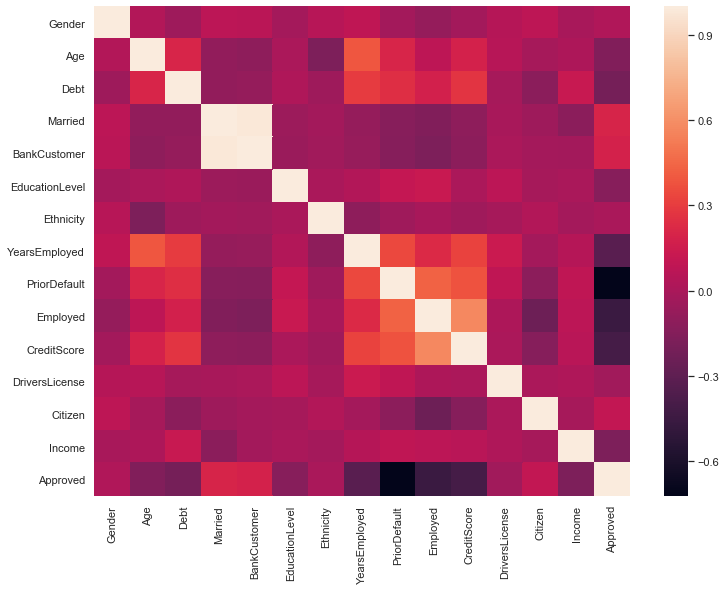

In [103]:
#correlation matrix
corr = credit_drop.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.savefig('corelation.jpg')

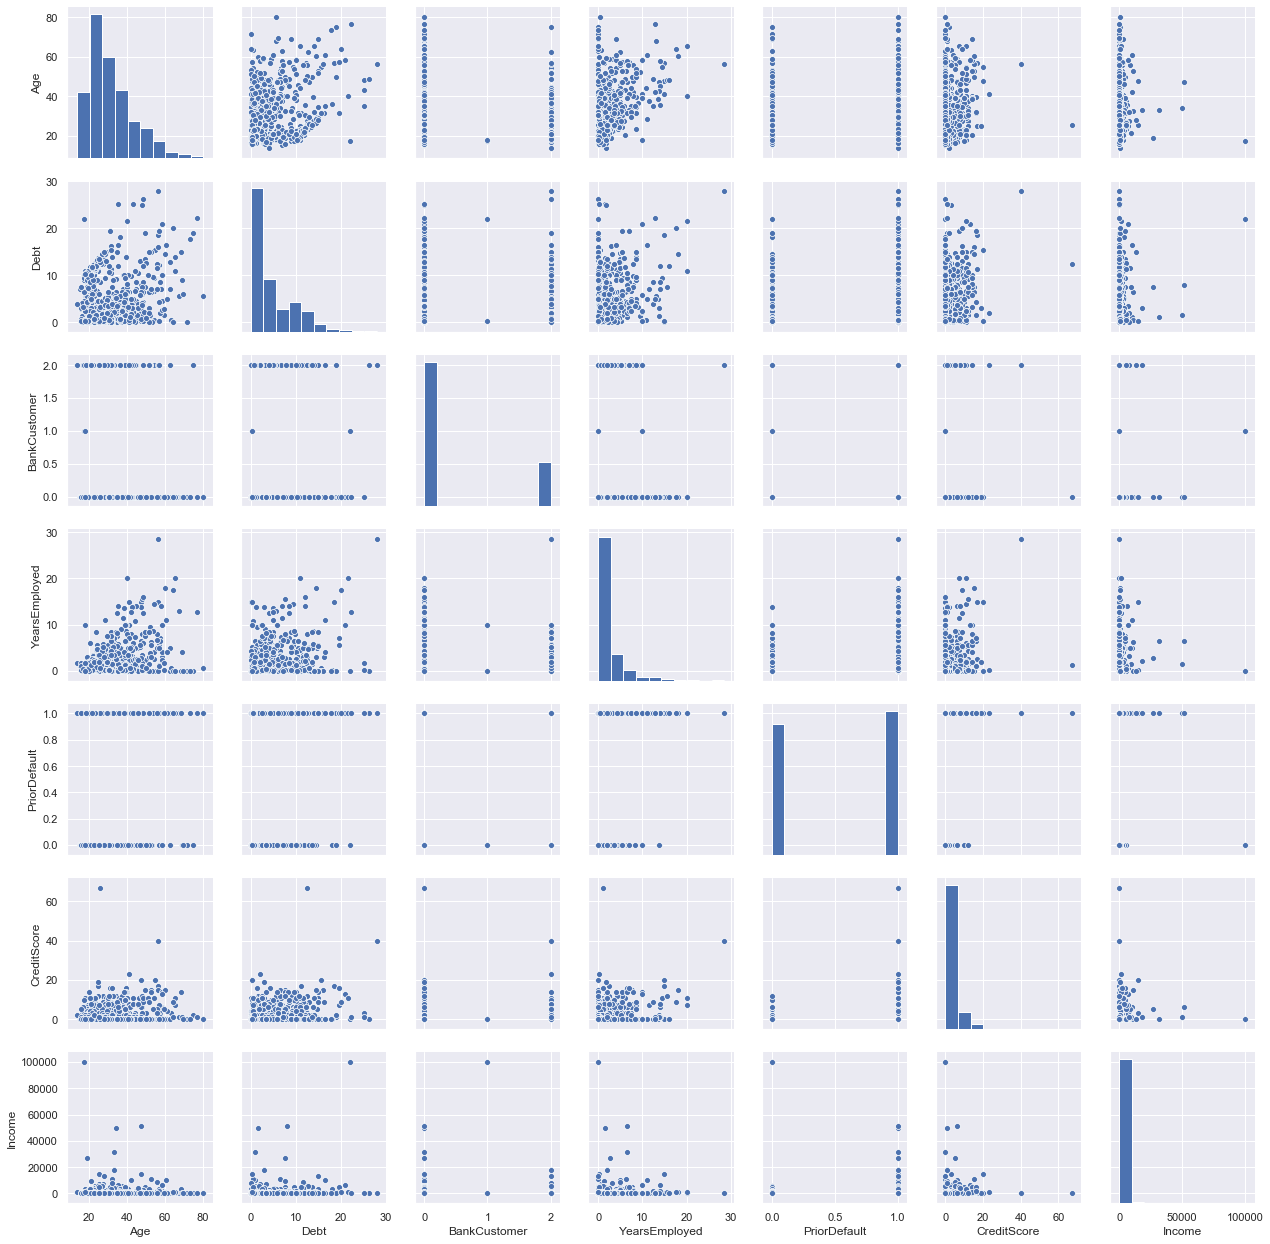

<Figure size 432x288 with 0 Axes>

In [104]:
#scatterplot
sns.set()
cols = ['Age', 'Debt', 'BankCustomer','YearsEmployed','PriorDefault','CreditScore','Income']
sns.pairplot(credit_drop[cols], size = 2.5)
plt.show();
plt.savefig('scatterplot.jpg')

# 2. Data Modelling 

# Random Forest

In [66]:
credit_dummies.columns

Index(['Gender', 'Age', 'Debt', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income', 'Approved',
       'Married_0', 'Married_1', 'Married_2', 'EducationLevel_0',
       'EducationLevel_1', 'EducationLevel_2', 'EducationLevel_3',
       'EducationLevel_4', 'EducationLevel_5', 'EducationLevel_6',
       'EducationLevel_7', 'EducationLevel_8', 'EducationLevel_9',
       'EducationLevel_10', 'EducationLevel_11', 'EducationLevel_12',
       'EducationLevel_13', 'Citizen_0', 'Citizen_1', 'Citizen_2',
       'DriversLicense_0', 'DriversLicense_1', 'Ethnicity_0', 'Ethnicity_1',
       'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4', 'Ethnicity_5',
       'Ethnicity_6', 'Ethnicity_7', 'Ethnicity_8'],
      dtype='object')

In [68]:
from sklearn.model_selection import train_test_split
# remove irrelevant features

In [23]:
#credit_drop=credit.drop(['DriversLicense', 'ZipCode'], axis=1)

In [69]:
credit_dummies.to_numpy

<bound method DataFrame.to_numpy of      Gender    Age    Debt  BankCustomer  YearsEmployed  PriorDefault  \
0         1  30.83   0.000             0          1.250             1   
1         0  58.67   4.460             0          3.040             1   
2         0  24.50   0.500             0          1.500             1   
3         1  27.83   1.540             0          3.750             1   
4         1  20.17   5.625             0          1.710             1   
5         1  32.08   4.000             0          2.500             1   
6         1  33.17   1.040             0          6.500             1   
7         0  22.92  11.585             0          0.040             1   
8         1  54.42   0.500             2          3.960             1   
9         1  42.50   4.915             2          3.165             1   
10        1  22.08   0.830             0          2.165             0   
11        1  29.92   1.835             0          4.335             1   
12        0  38

In [70]:
X,y = credit_dummies.iloc[:,credit_dummies.columns != 'Approved'] , credit_dummies["Approved"]

# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=123)

In [71]:
X_train.head()

,Gender,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Married_0,...,DriversLicense_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Ethnicity_6,Ethnicity_7,Ethnicity_8
227,0,22.50,8.460,2,2.460,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
469,1,16.33,4.085,0,0.415,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
237,1,21.33,7.500,0,1.415,1,1,1,9800,0,...,0,0,0,0,0,0,0,0,1,0
120,1,39.92,6.210,0,0.040,1,1,1,300,0,...,0,0,0,0,0,0,0,0,1,0
273,1,38.25,10.125,2,0.125,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [73]:
rescaledX = scaler.transform(X)

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))
# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Random Forest classifier has accuracy of:  0.8623188405797102


array([[48, 14],
       [ 5, 71]], dtype=int64)

Feature ranking:
1. feature 5 (0.260848)
2. feature 4 (0.106387)
3. feature 7 (0.106369)
4. feature 8 (0.089890)
5. feature 2 (0.084818)
6. feature 1 (0.073552)
7. feature 6 (0.060000)
8. feature 0 (0.015477)
9. feature 34 (0.015304)
10. feature 22 (0.011227)
11. feature 25 (0.011159)
12. feature 38 (0.011099)
13. feature 29 (0.011092)
14. feature 30 (0.010969)
15. feature 13 (0.010724)
16. feature 3 (0.009068)
17. feature 10 (0.008718)
18. feature 14 (0.008488)
19. feature 18 (0.008320)
20. feature 24 (0.008024)
21. feature 11 (0.007819)
22. feature 26 (0.007156)
23. feature 20 (0.007098)
24. feature 28 (0.006658)
25. feature 12 (0.006396)
26. feature 31 (0.006314)
27. feature 17 (0.006193)
28. feature 33 (0.005859)
29. feature 21 (0.005120)
30. feature 16 (0.004445)
31. feature 15 (0.004134)
32. feature 36 (0.002250)
33. feature 27 (0.002177)
34. feature 35 (0.001944)
35. feature 39 (0.001573)
36. feature 32 (0.001133)
37. feature 9 (0.001122)
38. feature 19 (0.000652)
39. feature 23

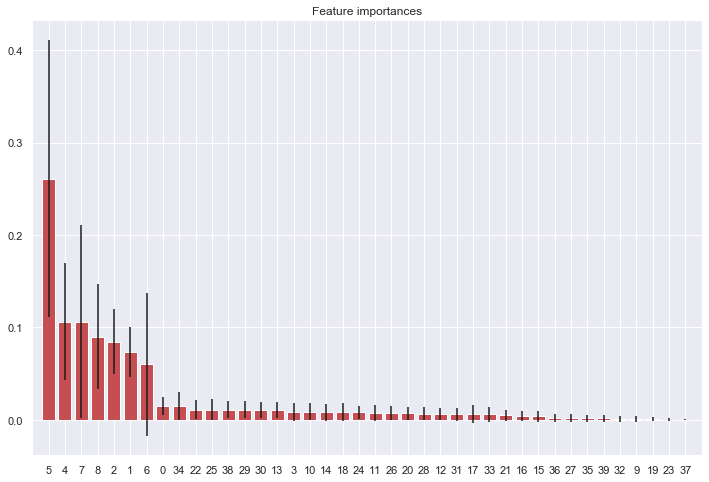

<Figure size 432x288 with 0 Axes>

In [75]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
plt.savefig('featureimportance.jpg')

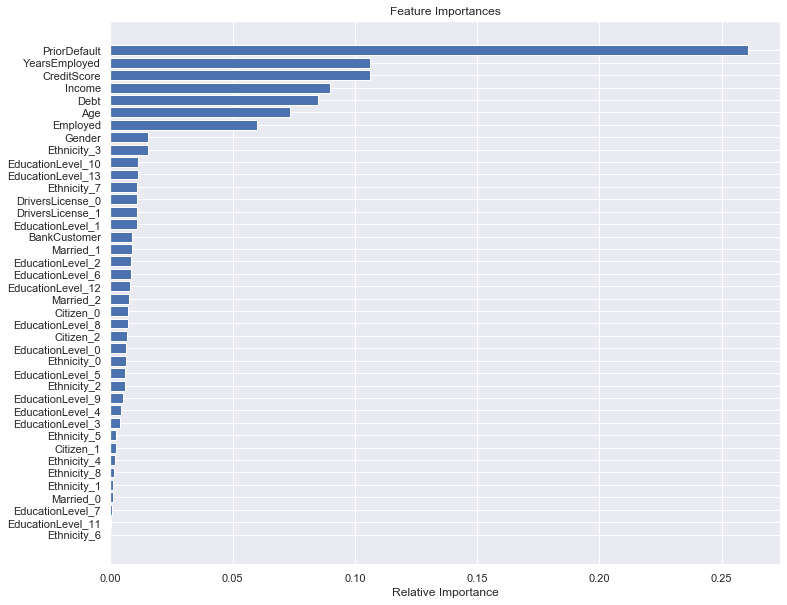

<Figure size 50400x7200 with 0 Axes>

In [76]:
credit_dummies = credit_dummies.drop(['Approved'], axis=1)
features = credit_dummies.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.figure(figsize=(700,100))
plt.savefig('features.jpg')

# Decision Tree

In [77]:
#decision trees
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [78]:
X_train.columns

Index(['Gender', 'Age', 'Debt', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income', 'Married_0',
       'Married_1', 'Married_2', 'EducationLevel_0', 'EducationLevel_1',
       'EducationLevel_2', 'EducationLevel_3', 'EducationLevel_4',
       'EducationLevel_5', 'EducationLevel_6', 'EducationLevel_7',
       'EducationLevel_8', 'EducationLevel_9', 'EducationLevel_10',
       'EducationLevel_11', 'EducationLevel_12', 'EducationLevel_13',
       'Citizen_0', 'Citizen_1', 'Citizen_2', 'DriversLicense_0',
       'DriversLicense_1', 'Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2',
       'Ethnicity_3', 'Ethnicity_4', 'Ethnicity_5', 'Ethnicity_6',
       'Ethnicity_7', 'Ethnicity_8'],
      dtype='object')

In [79]:
#model accuracy
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.782608695652174


C:\Users\geofr\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


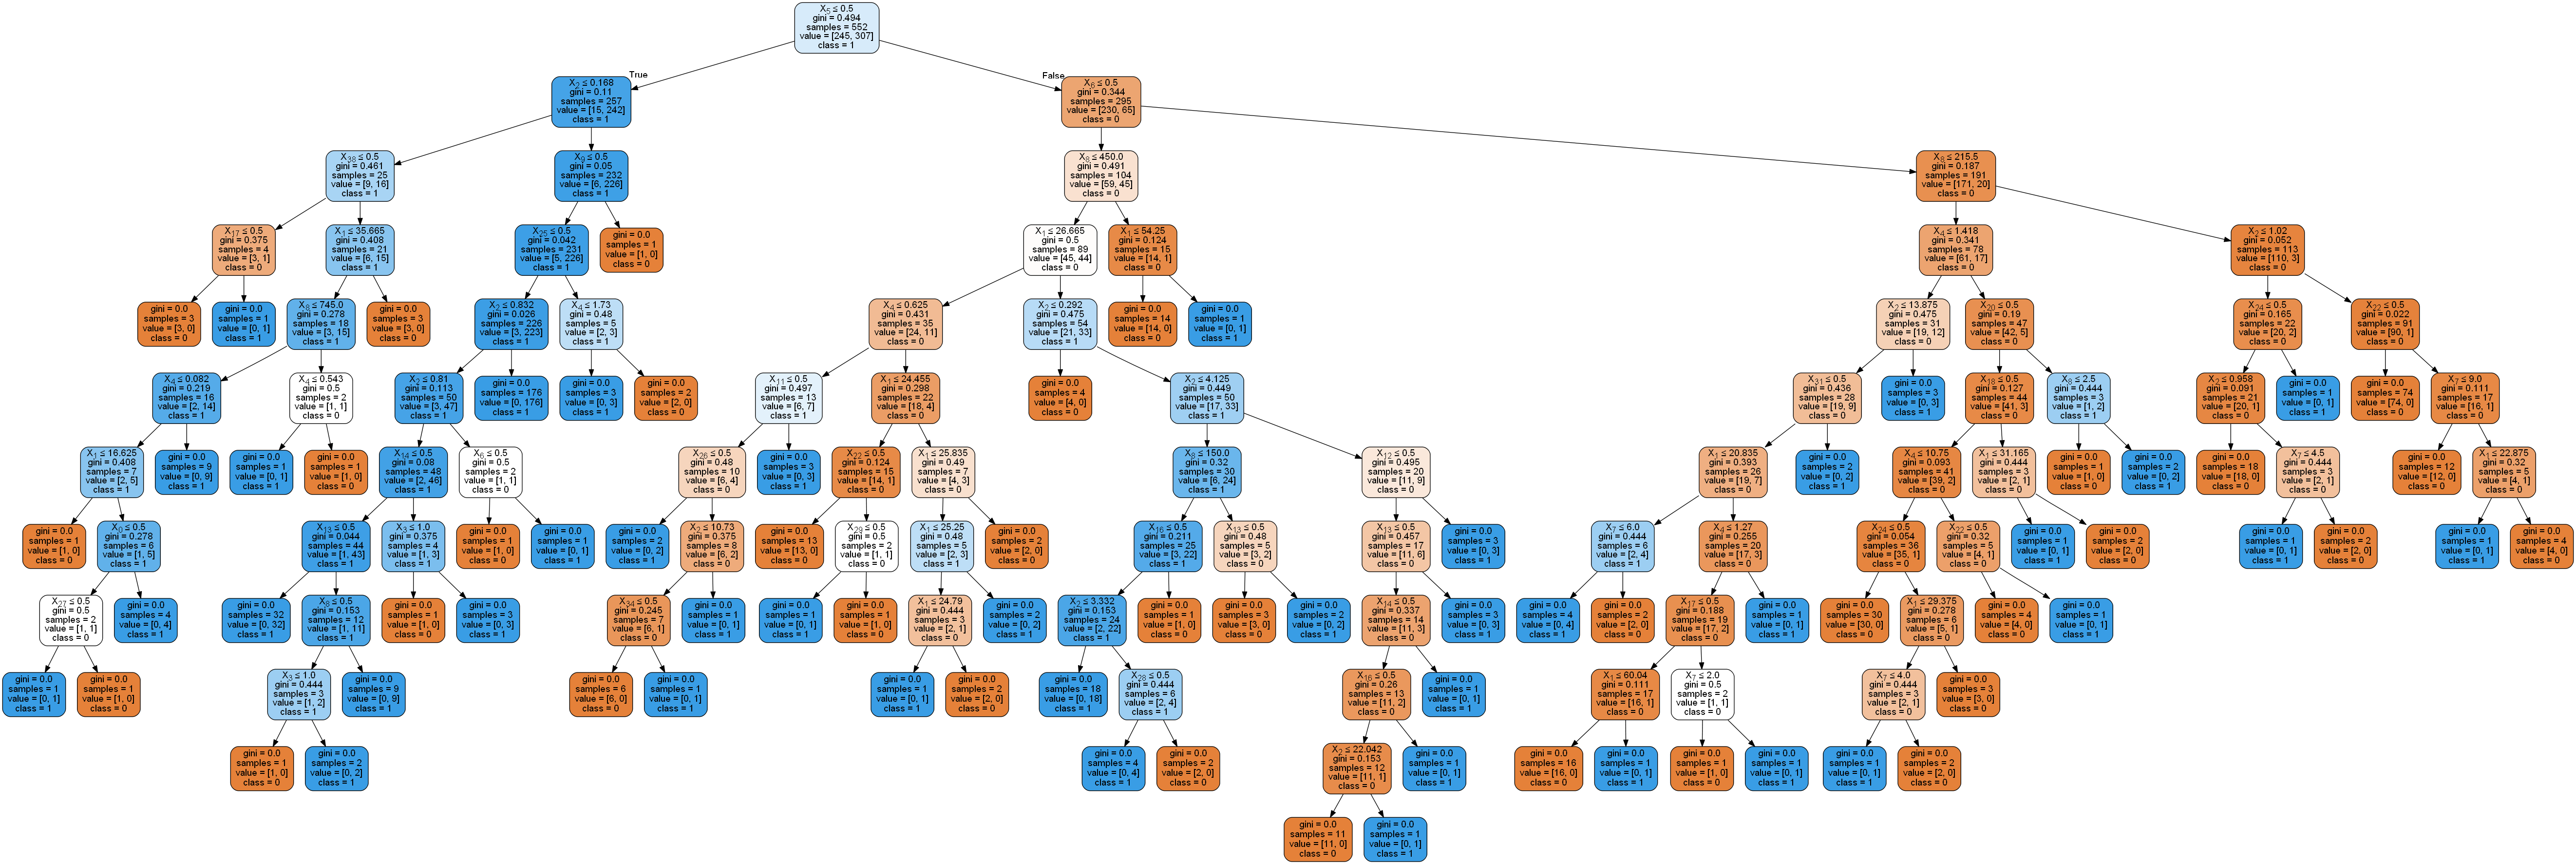

In [35]:
#graphing the decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import display, Image
import pydotplus

feature_cols = ['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','Citizen','Income','DriversLicense', 'ZipCode']

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
                filled=True, rounded=True,
               special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('credit.png')
Image(graph.create_png())